In [41]:
%matplotlib inline

In [7]:
import os
import io
import h5py
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from PIL import Image

In [2]:
def rcparam():
    plt.rc('axes', linewidth=4.0, labelsize=18)
    # axes and axes labels properties
    plt.rc('xtick.major', size=10)  # length for x
    plt.rc('ytick.major', size=10)  # length for y
    plt.rc('lines', mew=5)
    plt.rc('lines', lw=4)  # line thickness
    plt.rc('ytick', labelsize=12)  # ytick label size
    plt.rc('xtick', labelsize=12)  # xtick label size
    plt.rc('xtick.major', pad=5)  # xtick padding distance
    plt.rc('ytick.major', pad=5)  # ytick padding distance

### Attempt 3 create hdf5 version directly fromm bytesio buffer

In [31]:
def plot_2d_heatmap_buf(data, title=None, axis_labels=None, axis_tick_format='%.0f', force_matching_ticks=True, save_fig=False, fig_name='HeatMap.png', **kwargs):
    rcparam()
    font = {'fontsize': 20,
            'fontweight' : 'bold',
            'verticalalignment': 'baseline'}

    # Figure Creation
    fig, ax = plt.subplots()
    if 'invert_color' in kwargs:
        if kwargs['invert_color']:
            plt.set_cmap('viridis_r')
    if 'absolute_max' in kwargs:
        cax = ax.pcolormesh(data, vmin=0., vmax=kwargs['absolute_max'])
    else:
        cax = ax.pcolormesh(data)
    cbar = fig.colorbar(cax)

    # Adding labels
    if title:
        plt.title(title, fontdict=font)
    if axis_labels:
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
    if force_matching_ticks:
        xticks = ax.get_xticks()[0:-1]
        ax.set_yticks(xticks)

    ax.xaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    ax.yaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    
    buf = io.BytesIO()
    if save_fig:
        plt.savefig(buf, transparent=True, dpi=100, bbox_inches='tight', pad_inches=0.1, format='png')
    plt.close()
    return buf

In [32]:
h5_sim_path = '../Simulation_Results/Trial_0001-py/simulation_data.h5'
h5_output_path = 'outputs/analysis_outputs.h5'

In [33]:
# Loading a prob2d
sim_h5_file = h5py.File(h5_sim_path, "r")
prob2d = np.array(sim_h5_file['Prob2D/set_00001'])
sim_h5_file.close()

In [34]:
buf = plot_2d_heatmap_buf(prob2d, title='Probability', save_fig=True)
buf.seek(0)
img = Image.open(buf)
img = np.asarray((img), dtype="uint8")

In [35]:
analysis_h5_file = h5py.File(h5_output_path, "w")

dset = analysis_h5_file.create_dataset('image_test', data=img, shape=img.shape, maxshape=img.shape, dtype='uint8', compression="gzip")
dset.attrs['CLASS'] = np.string_('IMAGE')
dset.attrs['IMAGE_VERSION'] = np.string_('1.2')
dset.attrs['IMAGE_MINMAXRANGE'] = np.asarray([0, 255], dtype='uint8')
dset.attrs['IMAGE_SUBCLASS'] = np.string_('IMAGE_TRUECOLOR')
dset.attrs['INTERLACE_MODE'] = np.string_('INTERLACE_PIXEL')

analysis_h5_file.close()

### Attempt 2 convert png to hdf5 directly with PIL/image

In [13]:
def plot_2d_heatmap_file(data, title=None, axis_labels=None, axis_tick_format='%.0f', force_matching_ticks=True, save_fig=False, fig_name='HeatMap.png', **kwargs):
    rcparam()
    font = {'fontsize': 20,
            'fontweight' : 'bold',
            'verticalalignment': 'baseline'}

    # Figure Creation
    fig, ax = plt.subplots()
    if 'invert_color' in kwargs:
        if kwargs['invert_color']:
            plt.set_cmap('viridis_r')
    if 'absolute_max' in kwargs:
        cax = ax.pcolormesh(data, vmin=0., vmax=kwargs['absolute_max'])
    else:
        cax = ax.pcolormesh(data)
    cbar = fig.colorbar(cax)

    # Adding labels
    if title:
        plt.title(title, fontdict=font)
    if axis_labels:
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
    if force_matching_ticks:
        xticks = ax.get_xticks()[0:-1]
        ax.set_yticks(xticks)

    ax.xaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    ax.yaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    
    if save_fig:
        plt.savefig(fig_name, transparent=True, dpi=150, bbox_inches='tight', pad_inches=0.1, format='png')
    #plt.show()
    plt.close()

In [14]:
h5_sim_path = '../Simulation_Results/Trial_0001-py/simulation_data.h5'
h5_output_path = 'outputs/analysis_outputs.h5'
fig_name = 'outputs/HeatMap.png'

In [15]:
# Loading a prob2d
sim_h5_file = h5py.File(h5_sim_path, "r")
prob2d = np.array(sim_h5_file['Prob2D/set_00001'])
sim_h5_file.close()
# Saving image file to disk
plot_2d_heatmap_file(prob2d, title='Probability', save_fig=True, fig_name=fig_name)

In [23]:
#img = cv2.imread(fig_name)[...,::-1]
img = Image.open(fig_name)
img = np.asarray((img), dtype="uint8")

1847580

In [25]:
analysis_h5_file = h5py.File(h5_output_path, "w")

dset = analysis_h5_file.create_dataset('image_test', data=img, shape=img.shape, maxshape=img.shape, dtype='uint8', compression="gzip")
dset.attrs['CLASS'] = np.string_('IMAGE')
dset.attrs['IMAGE_VERSION'] = np.string_('1.2')
dset.attrs['IMAGE_MINMAXRANGE'] = np.asarray([0, 255], dtype='uint8')
dset.attrs['IMAGE_SUBCLASS'] = np.string_('IMAGE_TRUECOLOR')
dset.attrs['INTERLACE_MODE'] = np.string_('INTERLACE_PIXEL')

analysis_h5_file.close()

## Attempt 1 convert png to hdf5 directly with numpy

In [3]:
def plot_2d_heatmap(data, title=None, axis_labels=None, axis_tick_format='%.0f', force_matching_ticks=True, save_fig=False, fig_name='outputs/HeatMap.png', **kwargs):
    rcparam()
    font = {'fontsize': 20,
            'fontweight' : 'bold',
            'verticalalignment': 'baseline'}

    # Figure Creation
    fig, ax = plt.subplots()
    if 'invert_color' in kwargs:
        if kwargs['invert_color']:
            plt.set_cmap('viridis_r')
    if 'absolute_max' in kwargs:
        cax = ax.pcolormesh(data, vmin=0., vmax=kwargs['absolute_max'])
    else:
        cax = ax.pcolormesh(data)
    cbar = fig.colorbar(cax)

    # Adding labels
    if title:
        plt.title(title, fontdict=font)
    if axis_labels:
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
    if force_matching_ticks:
        xticks = ax.get_xticks()[0:-1]
        ax.set_yticks(xticks)

    ax.xaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    ax.yaxis.set_major_formatter(FormatStrFormatter(axis_tick_format))
    
    #buf = io.BytesIO()
    if save_fig:
        plt.savefig(fig_name, transparent=True, bbox_inches='tight', pad_inches=0.1, format='png')
        #plt.savefig(buf, format='png')
        #plt.savefig(buf, transparent=True, bbox_inches='tight', pad_inches=0.1, format='png')
    plt.show()
    #plt.close()
    #buf.seek(0)
    #return buf.read()
    #return buf
    

In [12]:
# https://github.com/raguiar2/jpg_to_h5/blob/master/jpg_to_h5.py
def convert_file(input_dir, filename, output_dir):
    filepath = input_dir + '/' + filename
    fin = open(filepath, 'rb')
    binary_data = fin.read()
    new_filepath = output_dir + '/' + filename[:-4] + '.hdf5'
    f = h5py.File(new_filepath)
    dt = h5py.special_dtype(vlen=np.dtype('uint8'))
    dset = f.create_dataset('binary_data', (100, ), dtype=dt)
    #dset[0] = np.fromstring(binary_data, dtype='uint8')
    dset[0] = np.frombuffer(binary_data, dtype='uint8')

In [8]:
h5_sim_path = '../Simulation_Results/Trial_0001-py/simulation_data.h5'

In [9]:
sim_h5_file = h5py.File(h5_sim_path, "r")
prob2d = np.array(sim_h5_file['Prob2D/set_00001'])
sim_h5_file.close()

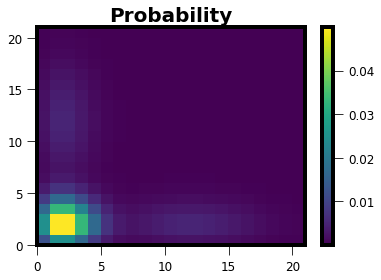

In [10]:
plot_2d_heatmap(prob2d, title='Probability', save_fig=True)

In [ ]:
input_dir = 'outputs'
filename = 'Heatmap.png'
output_dir = 'outputs'
convert_file(input_dir, filename, output_dir)

In [28]:
hdf5_file = 'outputs/Heatmap.hdf5'
h5_file = h5py.File(hdf5_file, "r")

#print(list(h5_file.keys()))
img = h5_file['binary_data'].value[0]

h5_file.close()

In [30]:
img.tofile('outputs/Heatmap2.png')